<a href="https://colab.research.google.com/github/TharuWitharana/image-classification-using-ml/blob/main/Copy_of_Image_classifier_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
input_dataset = "/content/drive/MyDrive/tealeaf"

In [4]:
import os
import shutil
import random

In [5]:
# def rename_and_copy_images(input_folder, output_folder):
#     os.makedirs(output_folder, exist_ok=True)

#     for class_folder in os.listdir(input_folder):
#         class_path = os.path.join(input_folder, class_folder)
#         if os.path.isdir(class_path):
#             output_class_folder = os.path.join(output_folder, class_folder)
#             os.makedirs(output_class_folder, exist_ok=True)

#             count = 1
#             for image in os.listdir(class_path):
#                 if image.endswith(('.jpg', '.jpeg', '.png')):  # You can add other image extensions if needed
#                     src = os.path.join(class_path, image)
#                     cropped_file_name = f"{class_folder}{count}.jpg"
#                     dst = os.path.join(output_class_folder, cropped_file_name)
#                     shutil.copy(src, dst)
#                     count += 1

# Example usage
input_folder = "/content/drive/MyDrive/tealeaf"
output_folder = "/content/drive/MyDrive/tealeafrenamedfolder"  # Path to your desired output folder

# rename_and_copy_images(input_folder, output_folder)


In [6]:
def create_disease_file_names_dict(output_folder):
    disease_file_names_dict = {}
    for class_folder in os.listdir(output_folder):
        class_path = os.path.join(output_folder, class_folder)
        if os.path.isdir(class_path):
            disease_name = class_folder
            file_list = []
            for entry in os.scandir(class_path):
                if entry.is_file():
                    file_list.append(entry.path)
            disease_file_names_dict[disease_name] = file_list
    return disease_file_names_dict

disease_file_names_dict = create_disease_file_names_dict(output_folder)
print(disease_file_names_dict)

{'white spot': ['/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot1.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot2.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot3.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot4.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot5.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot6.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot7.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot8.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot9.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot10.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot11.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot12.jpg', '/content/drive/MyDrive/tealeafrenamedfolder/white spot/white spot13.jpg', '/content/drive/My

In [7]:
# Create a dictionary that maps each disease name to a unique integer
class_dict = {}
count = 0
for disease_name in disease_file_names_dict.keys():
    class_dict[disease_name] = count
    count += 1

print(class_dict)

{'white spot': 0, 'red leaf spot': 1, 'healthy': 2, 'gray light': 3, 'brown blight': 4, 'bird eye spot': 5, 'Anthracnose': 6, 'algal leaf': 7}


In [8]:
import cv2
import pywt

In [9]:
def w2d(img, mode='haar', level=1):
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

In [10]:
# Step 4: Process images to create feature and label datasets
X, y = [], []
for disease_name, training_files in disease_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img, 'db1', 5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
            X.append(combined_img)
            y.append(class_dict[disease_name])

X = np.array(X).reshape(len(X), 32*32*4)
y = np.array(y)

print(X.shape)
print(y.shape)

(883, 4096)
(883,)


In [11]:
len(X[0])

4096

In [12]:
X[0]

array([252, 251, 254, ...,   0,   1, 128], dtype=uint8)

In [13]:
y[0]

0

In [14]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(883, 4096)

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8009049773755657

In [17]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        31
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       0.61      0.70      0.65        20
           4       0.73      0.76      0.75        25
           5       1.00      0.48      0.65        29
           6       0.51      0.79      0.62        24
           7       0.89      0.77      0.83        31

    accuracy                           0.80       221
   macro avg       0.82      0.79      0.79       221
weighted avg       0.84      0.80      0.80       221



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

k = 15 # Change this value to the desired number of neighbors

# Create a pipeline with a scaler and KNN classifier with the specified value of k
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)
# Evaluate the pipeline on the testing data
accuracy = pipe.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5610859728506787


In [19]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [20]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [5, 10, 15]
        }
    }
}


In [21]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.806607,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.696298,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.743153,{'logisticregression__C': 1}
3,knn,0.584564,{'kneighborsclassifier__n_neighbors': 5}


In [22]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())])}

In [23]:

best_estimators['random_forest'].score(X_test,y_test)

0.6968325791855203

In [24]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7285067873303167

In [25]:

best_clf = best_estimators['svm']

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[26,  0,  0,  0,  3,  0,  0,  2],
       [ 0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  6,  0],
       [ 4,  0,  0,  0, 19,  0,  1,  1],
       [ 0,  0,  0,  4,  0, 14, 11,  0],
       [ 0,  0,  0,  5,  0,  0, 19,  0],
       [ 3,  0,  0,  0,  4,  0,  0, 24]])

In [28]:
class_dict

{'white spot': 0,
 'red leaf spot': 1,
 'healthy': 2,
 'gray light': 3,
 'brown blight': 4,
 'bird eye spot': 5,
 'Anthracnose': 6,
 'algal leaf': 7}

Text(58.222222222222214, 0.5, 'Truth')

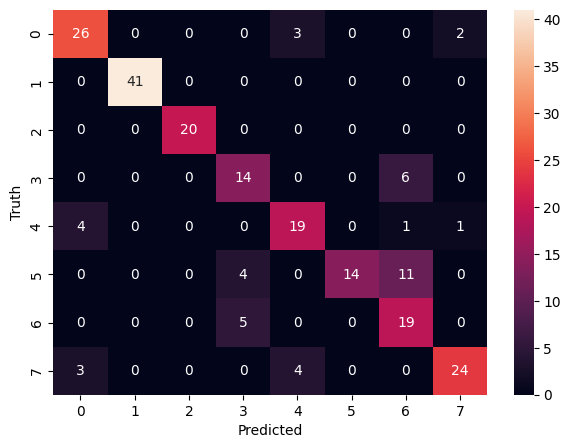

In [29]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')